####"In a world seemingly filled with chaos, physicists have discovered new forms of synchronization and are learning how to predict and control them."
##Road Map
In this project, the following steps are performed:


1.   Introducing the concepts of complex networks and synchronization.
2.   Familiarity with Runge-Kutta tool and graph data structure.
3.   Measuring the degree of synchronization of graph  using kuramoto order parameter.
4.   Rewiring algorithm implementation to improve synchronization.


## Complex Network (100 points)
Complex networks describe a wide range of natural and/or artificial systems, e.g. harmonic clapping of the crowd, simultaneous flashing of fireflies, the Internet, the WWW, networks of food webs, social acquaintances, paper citations, as well as many others. 

[More information about CN](https://www.researchgate.net/publication/324312765_What_is_a_Complex_Network_CDT-2 )
<br>
[Interesting video about complex networks and its samples](https://www.youtube.com/watch?v=t-_VPRCtiUg)
<br>


## Synchronization 
Synchronization is a fundamental physical phenomenon which can be observed in many different systems, ranging from biology to physics and even social phenomenon. "It was first described by Huygens in the 18th century, when he observed that pendulum clocks hanging on a wooden beam started to swing in unison."[\[link\]](http://www.incite-itn.eu/wp-content/uploads/VL/Kuramoto/index.html)

Every synchronization appears in a system with these properties:

* "Individual parts, which have their own, individual behavior". 

* "A coupling mechanism, which connects the parts and aligns their motion". 

Synchronization appears in a complex system if the coupling mechanism is stronger than the individual evolvement of different parts of the system.

We could say that synchronization happens if the two following conditions are confirmed:

* "All oscillators rotate with a common frequency. This means that their state are not changing proportional to any other oscillator state."[\[link\]](http://www.incite-itn.eu/wp-content/uploads/VL/Kuramoto/index.html)

* "The angular differences between the oscillators are bounded."[\[link\]](http://www.incite-itn.eu/wp-content/uploads/VL/Kuramoto/index.html)


[Improve your intuition of Synchronization](http://www.ams.org/publicoutreach/feature-column/gll-test)

## Runge-Kutta brief explanation 
If you want to find an approximate solution to the following ODE:

$$
\frac{dx}{dt} = f(x)
$$
<br>
You can use RK. A method of numerically integrating ordinary differential equations by using a trial step at the midpoint of an interval to cancel out lower-order error terms. We are discussing RK45 for more accuracy it provide in this project, but you can see how RK4 works as a simpler method relative to RK45.

$$
\begin{aligned} k_1 &= h f(x(t), t)\\ k_2 &= h f(x(t) + \frac{k_1}{2}, t + \frac{h}{2})\\ k_3 &= hf(x(t) + \frac{k_2}{2}, t + \frac{h}{2})\\ k_4 &= hf(x(t) + k_3, t + h)\end{aligned}
$$

$$
x(t + h) = x(t) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$

[Very useful video about RK and its implementation](https://www.youtube.com/watch?v=1FYrnwqWQNY)

[Runge-Kutta method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)


In [77]:
import copy
import math
import json
import numpy as np
import networkx as nx
import scipy as sp
from scipy.integrate import RK45
from matplotlib import pyplot as plt

# Runge-Kutta training (10 point)

assume:

$$
\begin{aligned} \frac{dy}{dt} = \sqrt{y} \\ y(2) = 1\end{aligned}
$$

plot y graph by 0.1 distance in interval (0, 10)

using 
[scipy.integrate.RK45](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.RK45.html)
and 
[matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)

In [78]:
# range-kutta training
def f(t, y):
    return y[0] ** 0.5


solution = RK45(f, 2, [1], 10, 0.1)

# collect data
### Begin your code

### End your code
t_values = []
y_values = []
for i in range(80):
    # get solution step state
    solution.step()
    t_values.append(solution.t)
    y_values.append(solution.y[0])

plt.plot(t_values, y_values)
plt.show()

# Graph (5 point)
The cell below is the graph class that you use for the rest of the project.

Fill get_mean_frequency and centroid_frequencies methods of class and don't change other methods.

In [79]:
# import graph and graph training
class Graph:
    # list of frequencies
    nodes_frequency = []
    # list of edges (as list like [1,2])
    adjacency_matrix = []
    naturalFreq = []
    vertices = []

    def __init__(self, nodes_frequency, adjacency_matrix, natural_frequency):
        self.nodes_frequency = nodes_frequency
        self.adjacency_matrix = adjacency_matrix
        self.naturalFreq = natural_frequency
        self.vertices = list(range(len(adjacency_matrix)))

    def number_of_nodes(self):
        return len(self.nodes_frequency)

    def get_mean_frequency(self):
        return sum(self.nodes_frequency) / len(self.nodes_frequency)

    def centroid_frequencies(self):
        mean_frequency = self.get_mean_frequency()
        self.nodes_frequency = [(frequency - mean_frequency) for frequency in self.nodes_frequency]

    def r(self):
        pass

    def is_edge(self, x, y):
        return self.adjacency_matrix[x][y] == 1

    def add_edge(self, x, y):
        if not self.is_edge(x, y):
            self.adjacency_matrix[x][y] = 1
            self.adjacency_matrix[y][x] = 1

    def remove_edge(self, x, y):
        if self.is_edge(x, y):
            self.adjacency_matrix[x][y] = 0
            self.adjacency_matrix[y][x] = 0

    def normalize_frequencies(self):
        for i in range(len(self.nodes_frequency)):
            while self.nodes_frequency[i] > math.pi:
                self.nodes_frequency[i] -= math.pi


In [169]:
# fix code
graph_json = json.load(open('graphs.json', 'r'))
graph = Graph(graph_json[0], graph_json[1], graph_json[2])

In [170]:
# test Graph functions
# fix code
print(graph.get_mean_frequency())
graph.centroid_frequencies()
print(graph.get_mean_frequency())


1.9224288087187333
-8.881784197001253e-17


# Measuring the degree of synchronization (25 point)
We use the Kuramoto order parameter to measure the degree syncronization in the network:
$$
  re^{i\psi} = \frac{1}{N} \Sigma_{j=1}^N e^{i \theta_j}
$$
In this equation, $r$ is the magnitude and $θ$ is frequency of each node. We know that $0 \leq r \leq 1$, and in order to have perfect syncronization, we must have $r=1$. In that case, we have $\forall i, j: \theta_i=\theta_j$. We call $r=0$, incoherence, since it shows that there is no syncronization among oscillators.

In the next cell, you must define the $r$ function. It gets the graph as input and calculates $r$ based on current frequncies.

[More information about Kuramoto order paramete and how it works](https://mathinsight.org/applet/kuramoto_order_parameters)

Hint: There is no need to use a complex number by transferring complex numbers into two-dimensional space.

In [171]:
# calculating r
def r(graph):
    graph.normalize_frequencies()
    i = 0
    j = 0
    for frequency in graph.nodes_frequency:
      i+=math.cos(frequency)
      j+=math.sin(frequency)
    r = ((i ** 2 + j ** 2) ** 0.5)/(graph.nodes_frequency.__len__())
    return r

In [172]:
# fixed
Graph.r = r
print(graph.r())

0.6467875452625027


# The Kuramoto Model (30 points)
We have $N$ oscillators which are coupled in a network. The Kuramoto model suggests an equation to calculate the phase of each oscillator based on their natural frequency and the effect of them on each other. In this equation, we get the derivative of oscillator's phase as a function of time.
$$
  \frac{d \theta_i(t)}{dt} = \omega_i +
    \kappa \Sigma_{j=1}^N A_{ij} H(\theta_j(t) - \theta_i(t))
$$
In this model, $\omega_i$ is the intrinsic frequency of the i'th oscillator, and $A$ is the adjacency matrix. $H(\theta)$ is a coupling function. It shows the coupling strength of 2 oscillators with $\theta$ phase difference. So it needs to be a $2\pi$-periodic function. We use $H(\theta)=sin(\theta)$ in this model. $\kappa$ is the coupling strength.

Since we have the derivatives, we can use RK45 to find the solution. First, define the $theta\_calculator$ function which gets graph, current frequencies and $\kappa$ as input and calculates $\frac{d\theta}{dt}$. Then, use this function in RK45 method to solve the problem.

[More about Kuramoto model](https://en.wikipedia.org/wiki/Kuramoto_model)

In [142]:
def theta_calculator(graph, k):
    """
    function calculate thetas and return  array of new_freq
    """
    # H(a) = sin(a)
    return [graph.naturalFreq[node] + k * np.sum(np.dot(graph.adjacency_matrix[node], np.sin(np.array(graph.nodes_frequency) - np.array(graph.nodes_frequency)[node]))) for node
            in range(graph.number_of_nodes())]


def next_step(graph, k, t0=0, t_bound=1, rtol=0.001, atol=1e-06):
    """
    function calculates step of each epoch for training sol and you can manually tune t0,t_bound,rtol,atol
    """
    # get frequencies
    frequencies = graph.nodes_frequency
    matrix = graph.adjacency_matrix
    f = lambda t, frequencies: theta_calculator(graph, k)
    solution = RK45(fun=f, t0=t0, y0=frequencies, t_bound=t_bound, vectorized=True, rtol=rtol, atol=atol)
    solution.step()
    graph.nodes_frequency = solution.y
    return graph

In [143]:
# calculate n step and plot graph r
def plot_rn(graph_main, k, n):
    graph = copy.deepcopy(graph_main)
    # calculate n step and plot r-n graph using pyplot

    # initialize axis lists
    step_values = []
    r_values = []

    # calculating r in each step (total of n step)
    for i in range(n):
        # get the next state of the graph
        next_graph = next_step(graph, k)
        # get the r value of new graph
        new_r = next_graph.r()

        # Append the results to axis lists
        step_values.append(i + 1)
        r_values.append(new_r)

    # Name Axises
    plt.xlabel('Step axis')
    plt.ylabel('r axis')

    # Plot r-n chart
    plt.plot(step_values, r_values)
    plt.show()

# Accept-Reject and Rewiring (30 points)
Imagine there are a fixed set of frequencies and our goal is to define a structure of network which optimizes the synchronization represented by the measure $r$ which has been already explained. In fact, checking all possible states requires $O(N!)$ while $N$ is a number of nodes. Obviously, it is not efficient enough. Thus, we try to reach an approximate solution. The method used here is Accept-Reject. In each stage, We rewire the current network in order to obtain better synchronization($r$ measure). If the rewiring result is better than the current network, it is accepted, else, it is rejected (in [refrence 1](https://www.researchgate.net/publication/260439709_Optimal_Synchronization_of_Complex_Networks/citations) you can find a better way to accept or reject rewired graph with guaranteed better synchronization in o(1)).

In the below cells, you should implement the rewire method which deletes 2 edges and adds 2 new edges to the network. Plus Accept-Reject checks the $r$ measure between the new graph that has been rewired $m$ times and the current graph and accepts the new network if it is more synchronized. And also $n$ is a maximum number of iterations to find the optimal solution.

In [144]:
# rewire graph
def rewire(graph_main):
    # completely random
    graph = copy.deepcopy(graph_main)
    lst = []
    X_add_1, Y_add_1 = add_remove_edge_randomly(graph, [], "add")
    if X_add_1 is not None:
        lst.append((X_add_1, Y_add_1))
        graph.add_edge(X_add_1, Y_add_1)

    X_add_2, Y_add_2 = add_remove_edge_randomly(graph, [], "add")
    if X_add_2 is not None:
        graph.add_edge(X_add_2, Y_add_2)
        lst.append((X_add_2, Y_add_2))

    X_remove_1, Y_remove_1 = add_remove_edge_randomly(graph, lst, "remove")
    if X_remove_1 is not None:
        graph.remove_edge(X_remove_1, Y_remove_1)
    X_remove_2, Y_remove_2 = add_remove_edge_randomly(graph, lst, "remove")
    if X_remove_2 is not None:
        graph.remove_edge(X_remove_2, Y_remove_2)

    return graph


def add_remove_edge_randomly(graph, lst, mode):
    vertices_1 = copy.deepcopy(graph.vertices)
    while len(vertices_1) != 0:
        X = vertices_1[np.random.randint(0, len(vertices_1))]
        vertices_2 = copy.deepcopy(graph.vertices)
        vertices_2.remove(X)
        while len(vertices_2) != 0:
            Y = vertices_2[np.random.randint(0, len(vertices_2))]
            if not ((X, Y) in lst or (Y, X) in lst):
                if mode == "add" and not graph.is_edge(X, Y):
                    return X, Y
                elif mode == "remove" and graph.is_edge(X, Y):
                    return X, Y
            vertices_2.remove(Y)
        vertices_1.remove(X)
    return None, None

In [145]:
# accept-reject algorithm (based on r in next m step)
def accept_reject(graph, n, m, k):
    graph = copy.deepcopy(graph)
    for i in range(n):
        graph_rewired = rewire(graph)
        graph_rewired_tmp = copy.deepcopy(graph_rewired)
        graph_tmp = copy.deepcopy(graph)
        for j in range(m):
            graph = next_step(graph, k)
            graph_rewired = next_step(graph_rewired, k)
        r = graph.r()
        r_rewired = graph_rewired.r()
        if r_rewired > r:
            graph = graph_rewired_tmp
        else:
            graph = graph_tmp
    #rewire graph, then compare new graph r in next m step with old graph; if new graph r was higher accept it as new graph. do it for n step.
    return graph

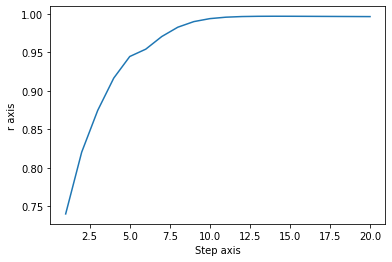

In [173]:
# fixed
graph_rewired = accept_reject(graph, 100, 10, 0.5)
plot_rn(graph_rewired,0.5,20)
plot_rn(graph,0.5,20)

# Refrences


1.   [Skardal, P. S., Taylor, D. & Sun, J. Optimal synchronization of complex networks. Phys. Rev.Lett. 113, 144101 (2014).](https://www.researchgate.net/publication/260439709_Optimal_Synchronization_of_Complex_Networks/citations)
2.   [Yamir Moreno & Amalio F Pacheco, Synchronization of Kuramoto oscillators in scale-free networks, EPL (Europhysics
Letters) 68, 603 (2004).](https://www.researchgate.net/publication/1941138_Synchronization_of_Kuramoto_Oscillators_in_Scale-Free_Networks/citations)

2. [da F. Costa, Luciano. (2018). What is a Complex Network? (CDT-2). 10.13140/RG.2.2.10450.04804/2.](https://www.researchgate.net/publication/324312765_What_is_a_Complex_Network_CDT-2)